In [1]:
# Introduction:
#     1)Import all the data from Start Universe 
#     2)Select 50 stocks for each rebalancing
#     3)After the stocks are selected, bring the data related to that stocks from Start Universe with inner join(Vlookup).
#       Add all the data to Weighting Demo dataframe
#     4)Calculate the other columns(FCap Wt*(1+Z_Value),Uncapped Wt,Max Wt,Capped Wt,Squared Diff/Uncapped Wt)
#     5)Create the sector dataframe from the information from step 4 with groupby function and inner join
#     6)Use scipy optimization by creating objective function and constraints
#     7)Add the new calculated weights to the Weighting Demo dataframe
#     8)Check your results by plotting the objective functions and constraints
#     9)Additional Step: How the results might change if we change the constraints in the future Ex:How the weights are
#       going to change if the sector weights are capped at from 40%, 45%, 50% ... 75% 
 

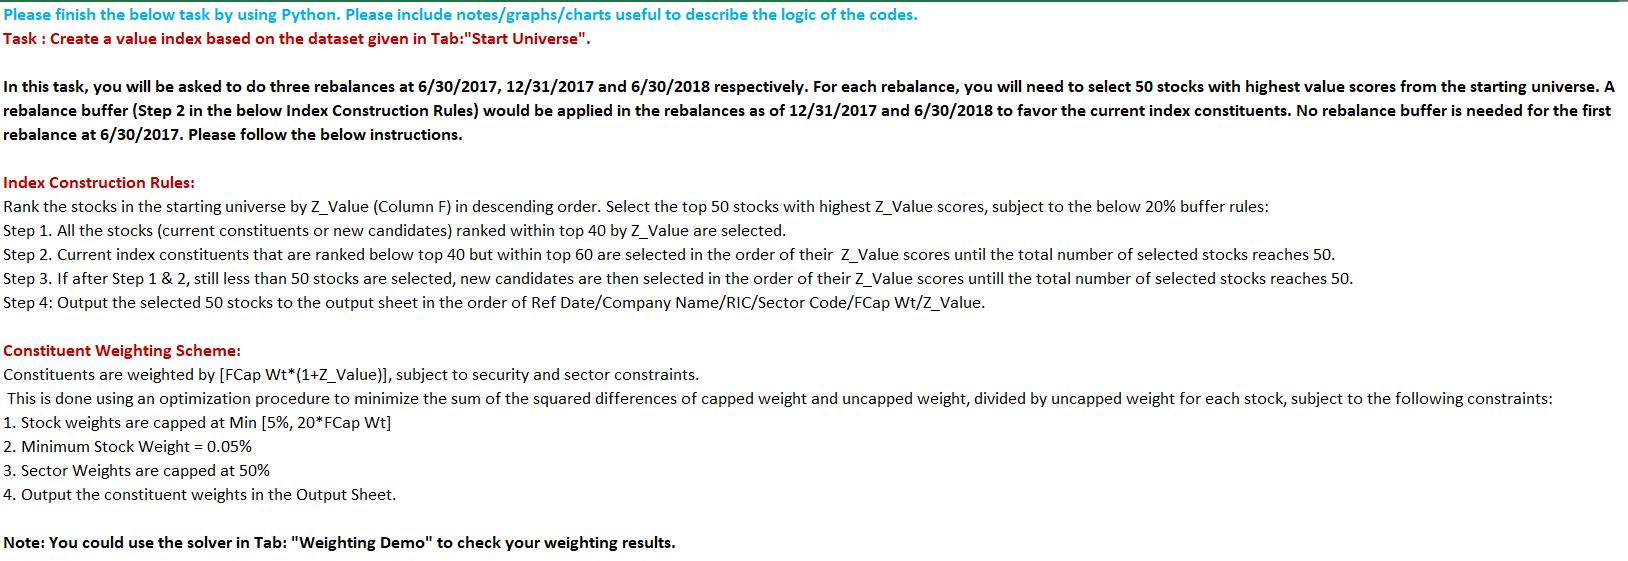

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel (r'C:\Users\tunah\OneDrive\Masaüstü\Quant Project\Rebalancing - Finding Optimal Index Weights Python\Tasks for Python Test.xlsx', sheet_name= 'Start Universe')
from IPython.display import Image
Image(filename=r'C:\Users\tunah\OneDrive\Masaüstü\Quant Project\Rebalancing - Finding Optimal Index Weights Python\capture.jpg')
# Picture of the assignment given:

In [2]:
df=pd.DataFrame(data)    #Creating a dataframe from the data in Start Universe sheet
df.head()                # Checking whether we get the correct data

,Ref Date,Company Name,RIC,Sector Code,FCap Wt,Z_Value
0,2017-06-30,"Shenzhen Development Bank Co.,Ltd.",000001.SZ,40,0.012811,-0.467510
1,2017-06-30,"China Vanke Co.,Ltd.",000002.SZ,40,0.017948,0.000052
2,2017-06-30,"Shenzhen Zhenye?Group? Co.,Ltd.",000006.SZ,40,0.001564,0.218126
3,2017-06-30,"China Baoan Group Co.,Ltd.",000009.SZ,20,0.002016,-0.551602
4,2017-06-30,"Csg Holding Co.,Ltd.",000012.SZ,15,0.002345,-0.510912


In [3]:
# Time_for_rebalancing will help the code to get the results for any rebalancing.
# If next period the new rebalancing(rebalancing4) is neeed. The dynamic code will bring the results.
Time_for_rebalancing=['2017-06-30','2017-12-31','2018-06-30'] #The new date/period can be added when the new data arrives.

df=df.sort_values(by=["Z_Value"], ascending=False) #Sorting all the values in Start Universe by Z_Value

use_this_rebalancing_only_once=0 # This will be used to calculate the first rebalancing only once. Use the if statement -
                                 # - in the foor loop only one time


#This for loop is going to find the stocks for 1. rebalancing and 2.rebalancing then it will find the 3. rebalancing 
#by using the information from the calculated 1.rebalancing and 2.rebalancing
for k in [1,2]:
#REBALANCING 1------------------------------------------------------------------------------------------------------ 
    
    if use_this_rebalancing_only_once==0: #Only rebalancing 1 for the first date 2017-06-30
        Data_first=df[df["Ref Date"]==Time_for_rebalancing[k-1]]     # Working with data from first date
        Current_Rebalance_Stocks=Data_first[0:50]["Company Name"].tolist() #Since there is no rebalance buffer for the 
        # 1. rebalancing, the first 50 stock is choosen. Then converting to the list for efficiency in the future.
    use_this_rebalancing_only_once=use_this_rebalancing_only_once+1 # Don't want to calculate rebalancing 1 again.
    
#REBALANCING 2, 3-------------------------------------------------------------------------------------------------------
    Data_2_and_3 = df[df["Ref Date"]==Time_for_rebalancing[k]]  #Working with data from 2017-12-31 and 2018-06-30
    Total_choosen_stocks_for_rebalancing = 0   #Counting how many stocks are selected so far for rebalancing2 , max=50

                               #  =====Step 1=====
    Step1_choosen_stocks_names = Data_2_and_3[0:40]["Company Name"]  #All the stocks ranked within top 40 are selected
    Number_of_stocks_choosen_step1= Step1_choosen_stocks_names.count() #Number of stocks selected from step1.
    Total_number_of_choosen_stocks_for_rebalancing=Number_of_stocks_choosen_step1 #Keep adding # of stocks each step

                               #  =====Step 2=====
    Step2_might_be_choosen_stocks=Data_2_and_3["Company Name"][40:60]  #Below top 40, within top 60 are selected
    Step2_choosen_stock_names=[]     #Fill the list in the for loop
    Number_of_stocks_choosen_step2= 0 #Need the number of selected stocks because it can't pass 10 (40 from the first step)

    for i in Step2_might_be_choosen_stocks:
        if i in Current_Rebalance_Stocks: 
            Step2_choosen_stock_names.append(i)
            Number_of_stocks_choosen_step2=Number_of_stocks_choosen_step2+1
            if Number_of_stocks_choosen_step2>10: #Number of stocks can be max 10 because we already have 40 from step1
                break
            
    Total_number_of_choosen_stocks_for_rebalancing=Number_of_stocks_choosen_step1+Number_of_stocks_choosen_step2

    Step1_choosen_stocks_names=Step1_choosen_stocks_names.tolist()  #Converting to the list of stock names from step 1 & 2
    Step1_and_2_selected_stock_names= Step1_choosen_stocks_names+ Step2_choosen_stock_names

                                # =====Step 3=====
    Step3_choosen_stock_names=[]
    Number_of_stocks_choosen_step3=0
    for i in Step2_might_be_choosen_stocks:  # Step3 will add new candidates until we reach total # of stocks = 50
        if i not in Step1_and_2_selected_stock_names: # not choose the already choosen stocks
            Step3_choosen_stock_names.append(i)
            Number_of_stocks_choosen_step3=Number_of_stocks_choosen_step3+1
            if Number_of_stocks_choosen_step3+Total_number_of_choosen_stocks_for_rebalancing==50: # Max is 50
                break

    Step1_2_and_3_selected_stock_names=Step1_and_2_selected_stock_names+Step3_choosen_stock_names
    Current_Rebalance_Stocks=Step1_2_and_3_selected_stock_names #After the stocks are selected for rebalancing2, these -
                                                                # - stocks will be saved for rebalancing 3   
        

In [4]:
Selected_Stocks=pd.DataFrame(Step1_2_and_3_selected_stock_names,columns=["Company Name"])
Selected_Stocks
# This shows us the selected stocks after 3 rebalancing:


,Company Name
0,"Hunan Valin Steel Tube & Wire Co.,Ltd."
1,Gan Su Jiu Steel Group Hong Xing Iron & Steel ...
2,"Hang Zhou Iron & Steel Co.,Ltd."
3,"Lingyuan Iron & Steel Co.,Ltd."
4,"SGIS Songshan Co.,Ltd."
5,"Hisense Electric Co.,Ltd."
6,"Handan Iron & Steel Co.,Ltd."
7,Jinan Iron And Steel Company Ltd.
8,"Konka Group Co.,Ltd"
9,Shanghai Power Transmission ? Distribution Co....


In [5]:

Data_first=df[df["Ref Date"]==Time_for_rebalancing[2]] #Get all the stocks for 2018-06-30

# Get the required data for only selected stocks from rebalancing by using inner join              
Weighting_Demo=pd.merge(Selected_Stocks,
                        Data_first,
                        on='Company Name',
                        how='inner')
Weighting_Demo=Weighting_Demo.sort_values(by=["Z_Value"],ascending=False,ignore_index=True)
Weighting_Demo.head(5)

,Company Name,Ref Date,RIC,Sector Code,FCap Wt,Z_Value
0,"Hunan Valin Steel Tube & Wire Co.,Ltd.",2018-06-30,000932.SZ,15,0.002032,2.909545
1,Gan Su Jiu Steel Group Hong Xing Iron & Steel ...,2018-06-30,600307.SS,15,0.000819,2.830186
2,"Hang Zhou Iron & Steel Co.,Ltd.",2018-06-30,600126.SS,15,0.000490,2.530922
3,"Lingyuan Iron & Steel Co.,Ltd.",2018-06-30,600231.SS,15,0.000690,2.499783
4,"SGIS Songshan Co.,Ltd.",2018-06-30,000717.SZ,15,0.001443,2.362958


In [6]:
#Calculate the column= FCap_Wt_ZValue, Uncapped Wt, Max Wt
Weighting_Demo["FCap Wt*(1+Z_Value)"]=Weighting_Demo["FCap Wt"]*(1+Weighting_Demo["Z_Value"])
Weighting_Demo["Uncapped Wt"]=Weighting_Demo["FCap Wt*(1+Z_Value)"]/Weighting_Demo["FCap Wt*(1+Z_Value)"].sum()
Weighting_Demo["Max Wt"]=np.minimum(0.05,Weighting_Demo["FCap Wt"]*20)
Weighting_Demo["Capped Wt"]=0.02 #Initialize the equal weight for each stock at the beginning.
Weighting_Demo["Squared Diff/Uncapped Wt"]=(Weighting_Demo["Capped Wt"]-Weighting_Demo["Uncapped Wt"])**2/Weighting_Demo["Uncapped Wt"]
Weighting_Demo["Sector_Code"]=Weighting_Demo["Sector Code"]
Weighting_Demo.head(5)

,Company Name,Ref Date,RIC,Sector Code,FCap Wt,Z_Value,FCap Wt*(1+Z_Value),Uncapped Wt,Max Wt,Capped Wt,Squared Diff/Uncapped Wt,Sector_Code
0,"Hunan Valin Steel Tube & Wire Co.,Ltd.",2018-06-30,000932.SZ,15,0.002032,2.909545,0.007944,0.029296,0.040637,0.02,0.002950,15
1,Gan Su Jiu Steel Group Hong Xing Iron & Steel ...,2018-06-30,600307.SS,15,0.000819,2.830186,0.003139,0.011575,0.016388,0.02,0.006133,15
2,"Hang Zhou Iron & Steel Co.,Ltd.",2018-06-30,600126.SS,15,0.000490,2.530922,0.001729,0.006376,0.009793,0.02,0.029109,15
3,"Lingyuan Iron & Steel Co.,Ltd.",2018-06-30,600231.SS,15,0.000690,2.499783,0.002416,0.008910,0.013807,0.02,0.013802,15
4,"SGIS Songshan Co.,Ltd.",2018-06-30,000717.SZ,15,0.001443,2.362958,0.004852,0.017894,0.028856,0.02,0.000248,15


Text(0.5, 1.0, ' Average Z_values for a Given Sector ')

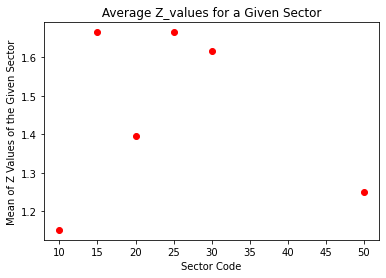

In [7]:
plt.plot(Weighting_Demo.groupby("Sector Code")["Z_Value"].mean(),'ro')
plt.xlabel('Sector Code')
plt.ylabel('Mean of Z Values of the Given Sector')
plt.title(" Average Z_values for a Given Sector ") 
# This graph represents the mean value of Z_Values for a given sector after the last rebalancing:

In [8]:
# Sector Data_Frame: The sector pivot table is going to be created
def sector_dataframe_function(weights):
    sector_dataframe=Weighting_Demo.groupby(["Sector Code"]).sum()
    number_of_stocks_for_given_sector=Weighting_Demo.groupby(["Sector Code"]).count()
    number_of_stocks_for_given_sector=number_of_stocks_for_given_sector["Company Name"]
    sector_dataframe1=pd.merge(number_of_stocks_for_given_sector,
                               sector_dataframe,
                               on='Sector Code',
                               how='inner')
    sector_dataframe1=sector_dataframe1.rename(columns={'Company Name':'# Stocks'})
    sector_dataframe1=sector_dataframe1.drop(columns=['FCap Wt','Z_Value','FCap Wt*(1+Z_Value)','Squared Diff/Uncapped Wt'])
    
    #Because stock code merge as an index number, I have to add the another column for a Sector_Code
    sector_dataframe1["Sector_Code"]=sector_dataframe1["Sector_Code"]/sector_dataframe1["# Stocks"]
    
    return sector_dataframe1
weights=np.full((1,50),0.02)
sector_dataframe_function(weights)
#Capped Wt is still showing the equally weighted porfolio results. It will be the optimum results in the following steps:

,# Stocks,Uncapped Wt,Max Wt,Capped Wt,Sector_Code
Sector Code,,,,,
10,2,0.111220,0.083553,0.04,10.0
15,28,0.604632,0.856726,0.56,15.0
20,11,0.089305,0.204946,0.22,20.0
25,6,0.087043,0.174214,0.12,25.0
30,2,0.009216,0.019074,0.04,30.0
50,1,0.098584,0.050000,0.02,50.0


In [9]:
# Scipy Optimization to find the optimal weights:This is where the optimum weights are going to be found

import numpy as np
from scipy.optimize import minimize
weights=np.full((1,50),0.02) # initalize the weights as 2%
#This for loop will constraint 'the total weights of stocks for a given sector can't be bigger than 50%''
#Sector Weights are capped at 50%
def group_constraint_parent(i,capped_weigth):   # i= the sector codes #capped_weight= Sector Weights are capped at what rate
    def group_constraint_child(x):       # x= the weights
        sum_of_stocks_weights_for_given_sector=0           # This sum_sector will be max 0.5 in the loop
        for u in range(50):
            if Weighting_Demo.iloc[u]["Sector Code"]==i: #Checking the row whether it is the given sector code
                sum_of_stocks_weights_for_given_sector=sum_of_stocks_weights_for_given_sector+x[u]
        return capped_weigth-sum_of_stocks_weights_for_given_sector # sum cannot be bigger than capped_weigth
    return group_constraint_child



In [10]:
# The objective function minimizes the sum of squared differences of capped weigt and uncapped weight,
# divided by uncapped weight for each stock
def objective_function(weights):
    result=np.sum((weights-Weighting_Demo["Uncapped Wt"])**2/Weighting_Demo["Uncapped Wt"])
    return np.array([result])

In [11]:
def optimize_function(weights,capped_weigth):
    constraint1=({'type':'eq','fun':lambda x:np.sum(x)-1}) #Sum of the weights should be 1.
    constraint2=({'type':'ineq','fun':lambda x:Weighting_Demo["Max Wt"]-x}) # Max Wt should be bigger than Capped wt(Weights)
    constraint3=({'type':'ineq','fun':lambda x:x-0.005}) #Minimum stock weight is 0.05%
    
    constraint4=[] #This will be filled by calling group_constraint_parent function. Sector Weights are capped at 50%
    sector=np.arange(10,65,5).tolist() #create a list from 10 to 60 by 5 step size
    for i in sector:
        constraint4.append({'type':'ineq','fun':group_constraint_parent(i,capped_weigth)})
    
    constraints=[constraint1,constraint2,constraint3]+constraint4
    bounds=tuple((0,1) for x in range(50))
    
    optimum=minimize(fun=objective_function,x0=weights,method='SLSQP',bounds=bounds,constraints=constraints)
    return optimum

In [12]:
final_results=optimize_function(weights,0.5)

In [13]:
final_results

     fun: array([0.31781191])
     jac: array([-0.05960438, -0.05874579, -0.06148567, -0.06578322, -0.06043154,
        1.35950227, -0.06154283, -0.06138149,  1.5466994 ,  1.62692603,
        1.66991413,  0.46517735, -1.30598499, -0.06541369,  1.89557997,
       -0.06013518,  1.5987018 ,  2.10356915, -0.06229918,  2.12815915,
       -0.06307477,  2.18738392,  2.20530152, -0.05849355, -0.05320986,
       -0.0574195 ,  2.26853304, -0.05817464, -0.05904749, -0.05969026,
       -0.9856385 , -0.06016712,  2.26823094, -0.05807026,  2.26582661,
        2.26935759,  2.26977041,  2.26303608,  2.27162402,  2.27143565,
       -0.05508505, -0.97697186,  0.17781617,  0.99726143, -0.06276432,
        2.26936834, -0.05887169, -0.06543502, -0.06000336,  2.26155862])
 message: 'Optimization terminated successfully'
    nfev: 2307
     nit: 44
    njev: 44
  status: 0
 success: True
       x: array([0.02840768, 0.01122548, 0.00617953, 0.0086434 , 0.01735434,
       0.01344582, 0.04917691, 0.01462173, 0.

In [14]:
final_results['fun'].tolist()

[0.3178119060859561]

In [15]:
# Save the weights(x) to Weighting_Demo Data frame
Weighting_Demo["Capped Wt"]=final_results["x"]

Plot_data=sector_dataframe_function(weights)
sector_dataframe_function(weights) # This is for calling
sector_results=sector_dataframe_function(weights)
Plot_data # This is for showing the result in the output

,# Stocks,Uncapped Wt,Max Wt,Capped Wt,Sector_Code
Sector Code,,,,,
10,2,0.111220,0.083553,0.078752,10.0
15,28,0.604632,0.856726,0.500000,15.0
20,11,0.089305,0.204946,0.183146,20.0
25,6,0.087043,0.174214,0.169027,25.0
30,2,0.009216,0.019074,0.019074,30.0
50,1,0.098584,0.050000,0.050000,50.0


Text(0.5, 1.0, ' Total Weights for a Given Sector ')

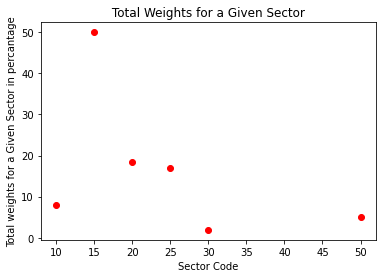

In [16]:
# Plot the total capped weight for each sector:
plt.plot(Plot_data["Sector_Code"],Plot_data["Capped Wt"]*100,'ro')
plt.xlabel('Sector Code')
plt.ylabel('Total weights for a Given Sector in percantage')
plt.title(" Total Weights for a Given Sector ") 

Text(0.5, 1.0, ' Number of Stocks for a Given Sector in the Index ')

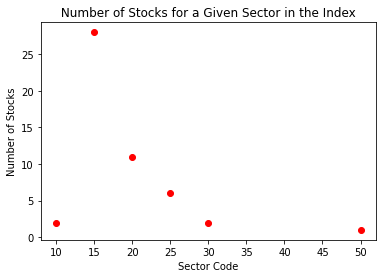

In [17]:
plt.plot(Plot_data["Sector_Code"],Plot_data["# Stocks"],'ro')
plt.xlabel('Sector Code')
plt.ylabel('Number of Stocks')
plt.title(" Number of Stocks for a Given Sector in the Index ") 
#This graph illustrates the number of stocks for each sector in the index.

In [18]:
# Add the new Squared Diff/Uncapped W results, after new weights are calculated, to the dataframe
Weighting_Demo["Squared Diff/Uncapped Wt"]=(Weighting_Demo["Capped Wt"]-Weighting_Demo["Uncapped Wt"])**2/Weighting_Demo["Uncapped Wt"]
Weighting_Demo
# Calculated new weights are in the Capped Wt column:

,Company Name,Ref Date,RIC,Sector Code,FCap Wt,Z_Value,FCap Wt*(1+Z_Value),Uncapped Wt,Max Wt,Capped Wt,Squared Diff/Uncapped Wt,Sector_Code
0,"Hunan Valin Steel Tube & Wire Co.,Ltd.",2018-06-30,000932.SZ,15,0.002032,2.909545,0.007944,0.029296,0.040637,0.028408,0.000027,15
1,Gan Su Jiu Steel Group Hong Xing Iron & Steel ...,2018-06-30,600307.SS,15,0.000819,2.830186,0.003139,0.011575,0.016388,0.011225,0.000011,15
2,"Hang Zhou Iron & Steel Co.,Ltd.",2018-06-30,600126.SS,15,0.000490,2.530922,0.001729,0.006376,0.009793,0.006180,0.000006,15
3,"Lingyuan Iron & Steel Co.,Ltd.",2018-06-30,600231.SS,15,0.000690,2.499783,0.002416,0.008910,0.013807,0.008643,0.000008,15
4,"SGIS Songshan Co.,Ltd.",2018-06-30,000717.SZ,15,0.001443,2.362958,0.004852,0.017894,0.028856,0.017354,0.000016,15
5,"Hisense Electric Co.,Ltd.",2018-06-30,600060.SS,25,0.000672,2.228490,0.002170,0.008005,0.013446,0.013446,0.003699,25
6,"Handan Iron & Steel Co.,Ltd.",2018-06-30,600001.SS,15,0.004268,2.221514,0.013748,0.050703,0.050000,0.049177,0.000046,15
7,Jinan Iron And Steel Company Ltd.,2018-06-30,600022.SS,15,0.001270,2.220684,0.004089,0.015079,0.025391,0.014622,0.000014,15
8,"Konka Group Co.,Ltd",2018-06-30,000016.SZ,25,0.000621,2.058088,0.001898,0.006998,0.012411,0.012411,0.004186,25
9,Shanghai Power Transmission ? Distribution Co....,2018-06-30,600627.SS,20,0.000328,1.990446,0.000980,0.003614,0.006554,0.006554,0.002391,20


Text(0.5, 1.0, ' Weights of the Selected Stocks after Last Rebalancing in the Index  ')

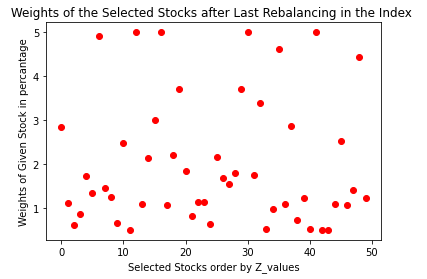

In [19]:
# Plot all the calculated weights for all constituents
plt.plot(Weighting_Demo["Capped Wt"]*100,'ro')
plt.xlabel('Selected Stocks order by Z_values')
plt.ylabel('Weights of Given Stock in percantage')
plt.title(" Weights of the Selected Stocks after Last Rebalancing in the Index  ") 

In [20]:
# Finally, save the Results to the Output Sheet
#Step 4: Output the selected 50 stocks to the output sheet in the order of 
        #Ref Date/Company Name/RIC/Sector Code/FCap Wt/Z_Value.     
import pandas
from openpyxl import load_workbook

book = load_workbook('Tasks for Python Test.xlsx')
writer = pandas.ExcelWriter('Tasks for Python Test.xlsx', engine='openpyxl') 
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
Weighting_Demo.to_excel(writer, "Output Sheet",startrow=0,columns=['Ref Date','Company Name','RIC','Sector Code','FCap Wt','Z_Value','FCap Wt*(1+Z_Value)','Uncapped Wt','Max Wt','Capped Wt','Squared Diff/Uncapped Wt'])
sector_results.to_excel(writer, "Output Sheet",startrow=0,startcol=14,columns=['Sector_Code','# Stocks','Uncapped Wt','Capped Wt','Max Wt'])

writer.save()

In [21]:
##Additional Steps/Analysis:

#to see how the sector weight capped changes constraint effect the objective function

#This for loop is going to calculate the Objective function (to minimise) results for different Sector Weights Capped
# for 40%, 45%, 50% , .... 75%

results_for_different_cap_rates=[]
for a in np.arange(0.4,0.8,0.05).tolist():
    final_results=optimize_function(weights,a)
    results_for_different_cap_rates.append(final_results['fun'].tolist())   

Text(0.5, 1.0, 'Sector Weights Capped Effect on the Index')

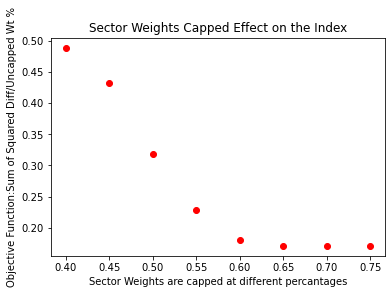

In [22]:
plt.plot(np.arange(0.4,0.8,0.05).tolist(),results_for_different_cap_rates,'ro')
plt.xlabel('Sector Weights are capped at different percantages')
plt.ylabel('Objective Function:Sum of Squared Diff/Uncapped Wt %')
plt.title("Sector Weights Capped Effect on the Index") 

# As it is seen, if the sum of capped weights for each sector constraint increase, the objective function decrease.
# However, after the 65% the objective function results are slightly same.